In [30]:
%reload_ext autoreload
%autoreload 2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from helpers import *
from ourHelpers import *
from models import *
from mask_to_submission import *
from submission_to_mask import *

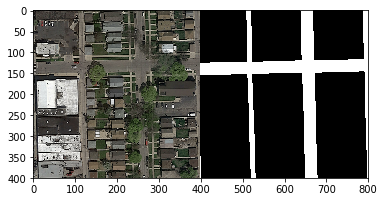

(100, 400, 400)


In [3]:
X, Y = load_training_dataset(sample_size=100)
Y = (Y > 0.5).astype(np.float32)
plt.imshow(concatenate_images(X[3], Y[3]==1))
plt.show()
print(Y.shape)

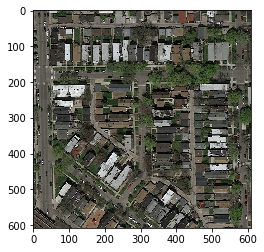

In [3]:
X_test = load_test_dataset()
plt.imshow(X_test[9])
plt.show()

# Load the model

The model is saved inside `model_dir` so the training can be stop at anytime and restart form the same directory

In [4]:
config = tf.estimator.RunConfig()
config._save_summary_steps = 20
model_params = {"learning_rate": 0.00001}
my_estimator = tf.estimator.Estimator(model_fn=baseline_model_fn, model_dir="../model_dir_all",
                                      params=model_params,config=config)

INFO:tensorflow:Using config: {'_model_dir': '../model_dir_all', '_tf_random_seed': 1, '_save_summary_steps': 20, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


## Prediction on the training set

In [5]:
predict_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": X_test},
    num_epochs=1,
    batch_size= 1,
    queue_capacity = 1,
    shuffle=False)

predictions = [p for p in my_estimator.predict(input_fn=predict_input_fn)]

(?, 608, 608, 3)
(?, 608, 608, 1)
(?, 608, 608)
INFO:tensorflow:Restoring parameters from ../model_dir_all/model.ckpt-5001


In [6]:
thr = 0.5
pred = np.array([p>thr for p in predictions])
Y_bin = np.array([y>0.5 for y in Y])
sk_mean_F1_score(Y_bin, pred)

NameError: name 'Y' is not defined

In [ ]:
def sk_mean_F1_score2(prediction, groundtruth):
    return f1_score(np.reshape(prediction, [-1]), np.reshape(groundtruth, [-1]), average='macro')

In [ ]:
sk_mean_F1_score2(Y_bin, pred)

90477


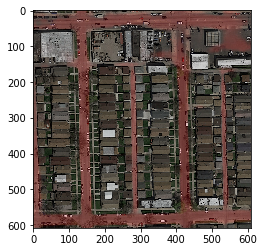

91183


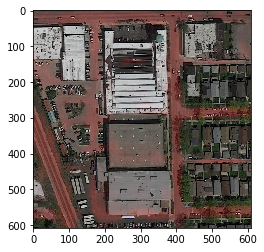

73827


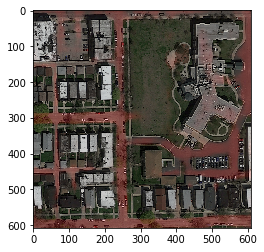

43896


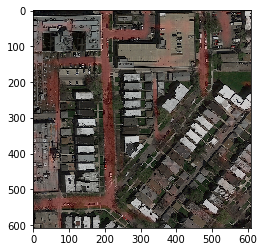

71387


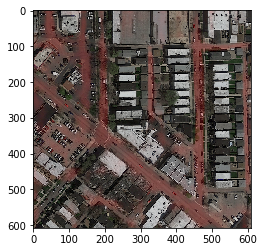

78314


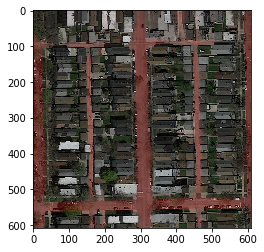

65008


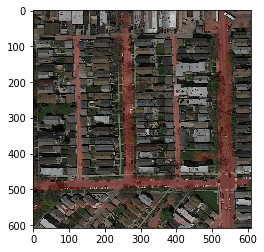

85149


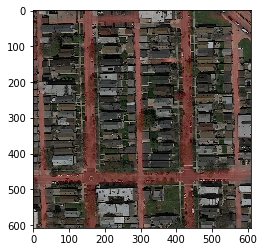

155685


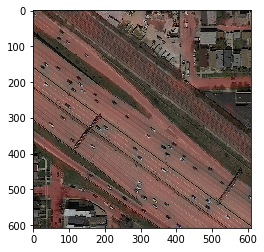

80919


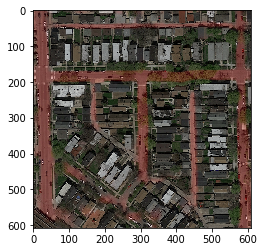

82382


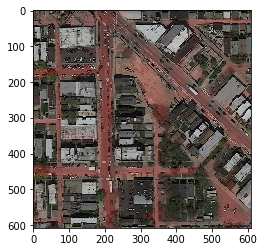

88384


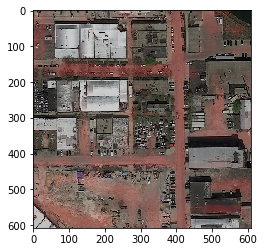

82992


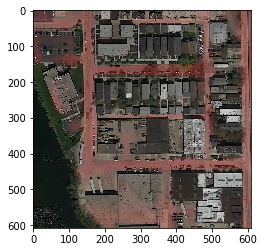

82017


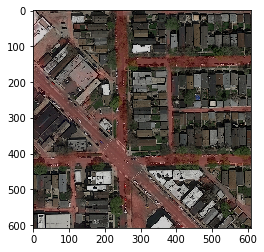

62927


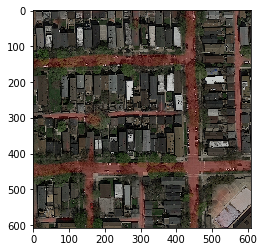

67877


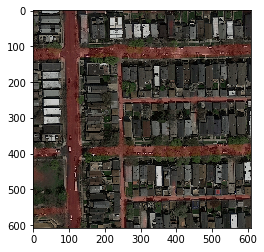

76157


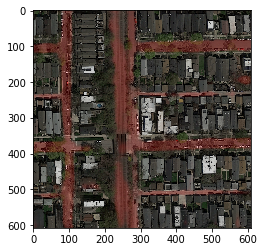

62861


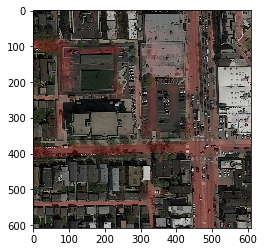

72721


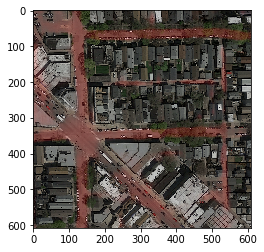

62313


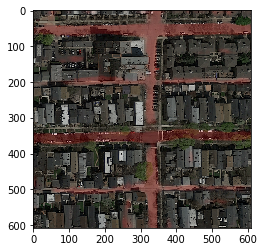

63590


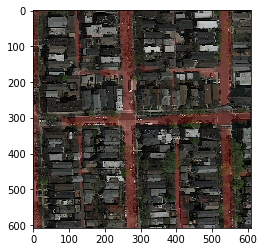

72395


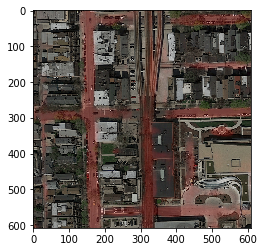

80653


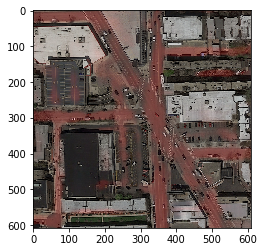

56759


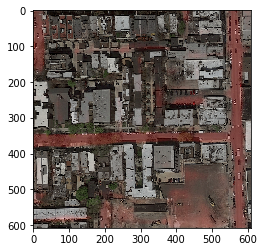

50639


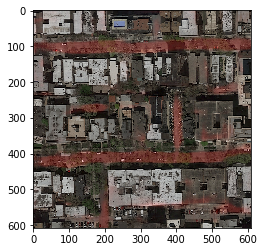

42286


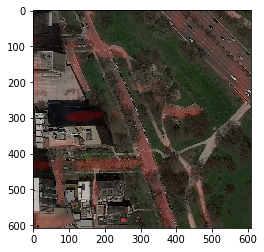

83543


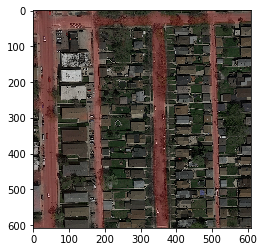

67545


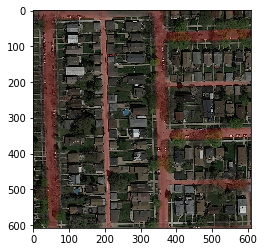

63206


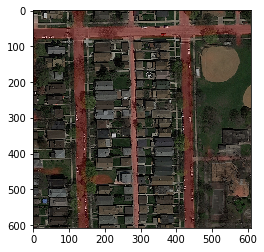

76478


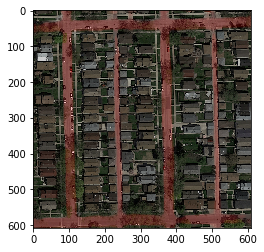

89311


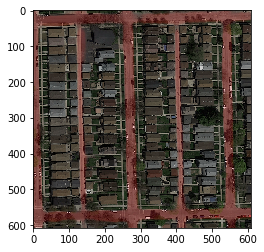

64267


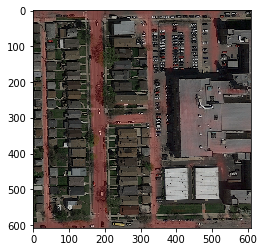

43376


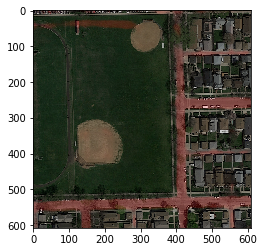

87074


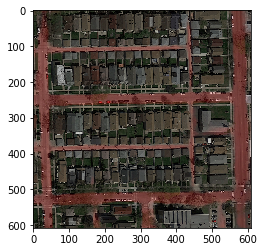

65367


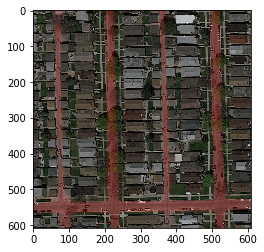

62792


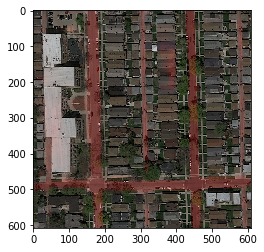

66033


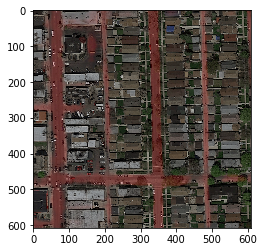

60456


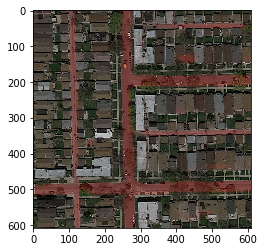

78468


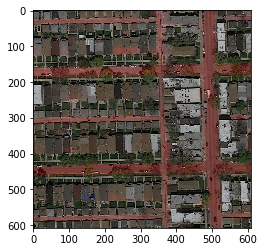

65445


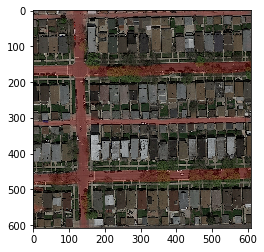

65590


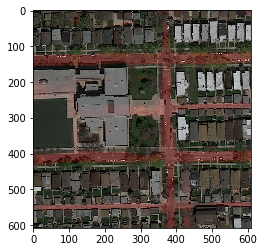

98103


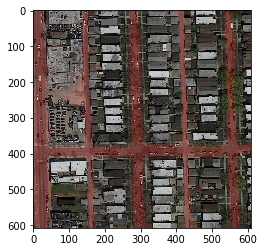

54649


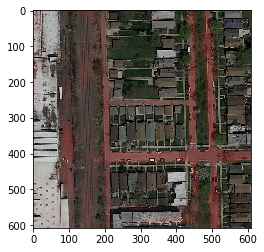

72621


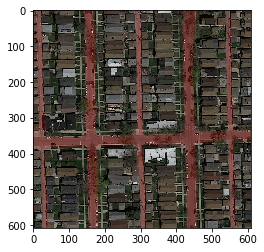

73881


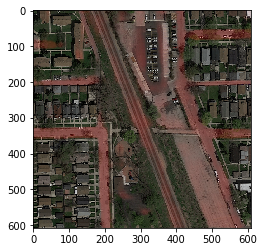

66192


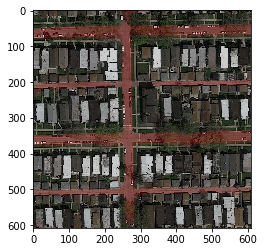

35317


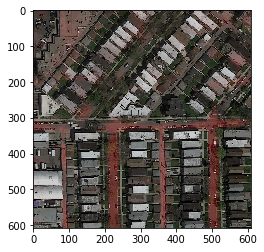

22147


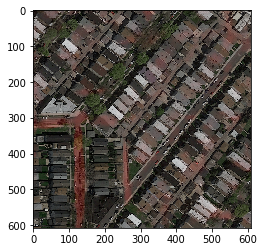

76535


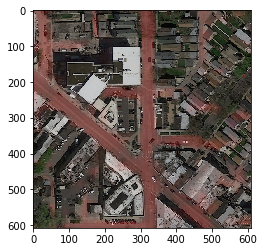

36646


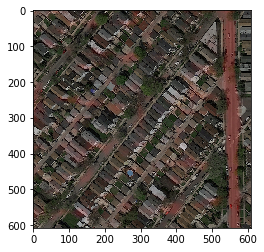

In [25]:
for i, p in enumerate(predictions):
    threshold = 0.5
    #print(p)
    print(np.sum(p>threshold))
    #plt.imshow(concatenate_images(X[i], np.array(p>threshold).astype(int)*255))
    #plt.imshow(concatenate_images(X_test[i], np.array(p>threshold).astype(int)))
    plt.imshow(make_img_overlay(X_test[i], p))
    #plt.imshow(np.array(p>threshold))
    plt.show()

In [15]:
#save prediction in a pickle
import pickle
pickle.dump(predictions, open( "predict.p", "wb" ))

In [17]:
my_predictions = pickle.load( open( "prediction.p", "rb" ) )

In [45]:
z = zip(X_test, my_predictions)
predictions_overlay = [make_img_overlay(p[0], p[1]) for p in z]
save_test_prediction(predictions= my_predictions)
save_test_prediction(predictions= predictions_overlay, overlay=True)

In [51]:
prediction_path = ["../data/test_set_images/test_"+ str(i+1) + "/prediction.png" for i in range(len(X_test))]
masks_to_submission("my_submission.csv", *prediction_path)

Max pixel intensity (should be 1 or close to 1): 1.0
Max pixel intensity (should be 1 or close to 1): 1.0
Max pixel intensity (should be 1 or close to 1): 1.0
Max pixel intensity (should be 1 or close to 1): 1.0
Max pixel intensity (should be 1 or close to 1): 1.0
Max pixel intensity (should be 1 or close to 1): 1.0
Max pixel intensity (should be 1 or close to 1): 1.0
Max pixel intensity (should be 1 or close to 1): 1.0
Max pixel intensity (should be 1 or close to 1): 0.996078
Max pixel intensity (should be 1 or close to 1): 1.0
Max pixel intensity (should be 1 or close to 1): 0.996078
Max pixel intensity (should be 1 or close to 1): 0.996078
Max pixel intensity (should be 1 or close to 1): 1.0
Max pixel intensity (should be 1 or close to 1): 1.0
Max pixel intensity (should be 1 or close to 1): 1.0
Max pixel intensity (should be 1 or close to 1): 1.0
Max pixel intensity (should be 1 or close to 1): 1.0
Max pixel intensity (should be 1 or close to 1): 1.0
Max pixel intensity (should be 

# TODO
- using test set find the best threshold for binary prediction

# Reference:

How to create your own [estimator](https://www.tensorflow.org/extend/estimators) 